In [1]:
import myML
import numpy as np
import matplotlib.pyplot as plt

In [3]:
limax = [200, 300, 10, 10, 45, 1, 0.18, 6, 2500, 0.08]
limin =  [150, 220, 6, -10, 16, 0.5, 0.08, 2.5, 1700, 0.025]
xnorm = myML.norm0to1_minmax(limax, limin)
def weight(x_t):
    Sw, Wfw, A, Lambda, q, lambda2, tc, Nz, Wdg, Wp = x_t
    Lambda = Lambda/360*2*np.pi

    w = 0.036*Sw**0.758*Wfw**0.0035*(A/(np.cos(Lambda)**2))**0.6*q**0.006*lambda2**0.04
    w = w*(100*tc/np.cos(Lambda))**(-0.3)*(Nz*Wdg)**0.49+Sw*Wp
    return w

In [4]:
mtrain = 80
mcv = 10
mtest = 10

x_train = myML.staticSampling('LHS', d=10, npoints=mtrain)
x_cv = myML.staticSampling('LHS', d=10, npoints=mcv)
x_test = myML.staticSampling('LHS', d=10, npoints=mtest)

y_train = np.array([weight(xnorm.recover(x_train))])
y_cv = np.array([weight(xnorm.recover(x_cv))])
y_test = np.array([weight(xnorm.recover(x_test))])

ynorm = myML.norm0to1(np.concatenate((y_train, y_cv, y_test), axis=1))
y_train = ynorm.normalize(y_train)
y_cv = ynorm.normalize(y_cv)
y_test = ynorm.normalize(y_test)

Trying with 1 nodes in the hidden layer
Trying with 2 nodes in the hidden layer
Trying with 3 nodes in the hidden layer
Trying with 4 nodes in the hidden layer
Trying with 5 nodes in the hidden layer
Trying with 6 nodes in the hidden layer
Trying with 7 nodes in the hidden layer
Trying with 8 nodes in the hidden layer
Trying with 9 nodes in the hidden layer
Trying with 10 nodes in the hidden layer
Trying with 11 nodes in the hidden layer
Trying with 12 nodes in the hidden layer
Trying with 13 nodes in the hidden layer
Trying with 14 nodes in the hidden layer
Trying with 15 nodes in the hidden layer
Trying with 16 nodes in the hidden layer
Trying with 17 nodes in the hidden layer
Trying with 18 nodes in the hidden layer
Trying with 19 nodes in the hidden layer
Trying with 20 nodes in the hidden layer
Trying with 21 nodes in the hidden layer
Trying with 22 nodes in the hidden layer


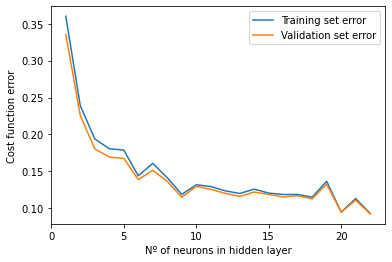

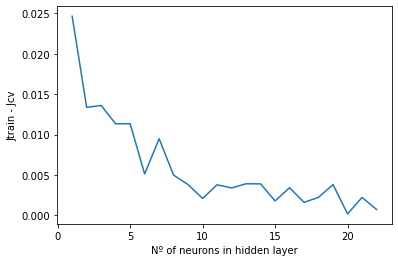

In [25]:
epochs = 150        #Times that the entire dataset is used to train the NN
lr = 0.1            #Learning rate
lambd = 0           #Regularization term
activation = ['ReLU','ReLU']
lossname = 'MSE'
optimizer = 'GD'

n = 22
yplot_train = np.zeros(n)
yplot_cv = np.zeros(n)
times = 300
aux_train = np.zeros(times)
aux_cv = np.zeros(times)
for i in range(1,n+1):
    nodes = [10, i, 1]
    print('Trying with '+str(i)+' nodes in the hidden layer')
    for j in range(times):
        neuralnetwork = myML.ANN(nodes, activation, lossname)
        costs = neuralnetwork.train(x_train, y_train, epochs, optimizer, lr, lambd)
        aux_train[j] = costs[epochs-1]

        temp = neuralnetwork.test(x_cv)
        aux_cv[j] = np.sum(neuralnetwork.loss(y_cv, temp))

    yplot_train[i-1] = np.mean(aux_train)
    yplot_cv[i-1] = np.mean(aux_cv)

plt.plot(range(1,n+1),yplot_train,label='Training set error')
plt.plot(range(1,n+1),yplot_cv,label='Validation set error')
plt.xlabel('Nº of neurons in hidden layer')
plt.ylabel('Cost function error')
plt.legend(loc='best')
plt.show()

plt.plot(range(1,n+1),np.abs(yplot_train-yplot_cv))
plt.xlabel('Nº of neurons in hidden layer')
plt.ylabel('Jtrain - Jcv')
plt.show()

Epoch nº499
Epoch nº999
Epoch nº1499
Epoch nº1999
Epoch nº2499
Epoch nº2999
Epoch nº3499
Epoch nº3999
Epoch nº4499
Epoch nº4999
Epoch nº5499
Epoch nº5999
0.0009695136271883906


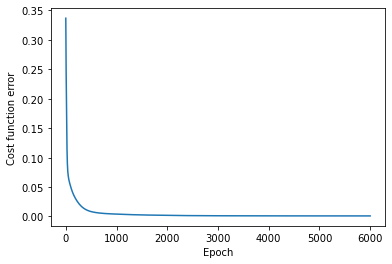

In [27]:
epochs = 6000      #Times that the entire dataset is used to train the NN
lr = 0.1            #Learning rate
lambd = 0           #Regularization term
activation = ['ReLU','ReLU']
lossname = 'MSE'
optimizer = 'GD'
nodes = [10, 10, 1]

neuralnetwork = myML.ANN(nodes, activation, lossname)
costs = neuralnetwork.train(x_train, y_train, epochs, optimizer, lr, lambd)
print(costs[-1])
plt.plot(range(epochs),costs)
plt.xlabel('Epoch')
plt.ylabel('Cost function error')
plt.show()

In [29]:
temp = neuralnetwork.test(x_test)
J = np.sum(neuralnetwork.loss(y_test, temp))
print('Mean squared error of the test set: '+str(J))

Mean squared error of the test set: 0.0060532235423683975


In [39]:
## NN Prediction
exampleindex = 2
x = np.array([x_test[:,exampleindex]]).T
y = np.array([y_test[:,exampleindex]])
#temp = neuralnetwork.testwithplot(x, 1, nodes)
temp = neuralnetwork.test(x)
error = np.sum(neuralnetwork.loss(y, temp))

fig = plt.figure(figsize=(10,10))

print('Cost function value: '+str(error))
print('Predicted value: '+str(ynorm.recover(temp)[0,0]))
print('Real value: '+str(ynorm.recover(y)[0,0]))

Cost function value: 0.00016591683658919568
Predicted value: 290.54915090521575
Real value: 292.4803255276692


<Figure size 720x720 with 0 Axes>